# Netflix Case Study

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show\_id:** Unique ID for every Movie / Tv Show  
**Type:** Identifier - A Movie or TV Show  
**Title:** Title of the Movie / Tv Show  
**Director:** Director of the Movie  
**Cast:** Actors involved in the movie/show  
**Country:** Country where the movie/show was produced  
**Date\_added:** Date it was added on Netflix  
**Release\_year:** Actual Release year of the movie/show  
**Rating:** TV Rating of the movie/show  
**Duration:** Total Duration - in minutes or number of seasons  
**Listed\_in:** Genre  
**Description:** The summary description

**Hints**

1.  The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
2.  Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
3.  Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
4.  Start by exploring a few questions: What type of content is available in different countries?
    1.  How has the number of movies released per year changed over the last 20-30 years?
    2.  Comparison of tv shows vs. movies.
    3.  What is the best time to launch a TV show?
    4.  Analysis of actors/directors of different types of shows/movies.
    5.  Does Netflix has more focus on TV Shows than movies in recent years
    6.  Understanding what content is available in different countries

**Evaluation Criteria (100 Points):**

1\. Defining Problem Statement and Analysing basic metrics **(10 Points)**

2\. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary **(10 Points)**

3\. Non-Graphical Analysis: Value counts and unique attributes ​​**(10 Points)**

4\. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis **(10 Points)**

4.2 For categorical variable(s): Boxplot **(10 Points)**

4.3 For correlation: Heatmaps, Pairplots **(10 Points)**

5\. Missing Value & Outlier check (Treatment optional) **(10 Points)**

6\. Insights based on Non-Graphical and Visual Analysis **(10 Points)**

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7\. Business Insights **(10 Points)** - Should include patterns observed in the data along with what you can infer from it

8\. Recommendations **(10 Points)** - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


In [2]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set_style('darkgrid')

## Data Cleaning and Splitting

In [3]:
df=pd.read_csv('./netflix.csv')
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5428,s5429,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",2017,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th..."
1069,s1070,Movie,Uppena,Buchi Babu Sana,"Panja Vaisshnav Tej, Krithi Shetty, Vijay Seth...",India,"April 14, 2021",2020,TV-14,145 min,"Dramas, International Movies, Romantic Movies",The son of a fishing community falls for a vil...
5820,s5821,Movie,Lavell Crawford: Can a Brother Get Some Love?,Michael Drumm,Lavell Crawford,United States,"August 2, 2016",2011,TV-MA,81 min,Stand-Up Comedy,"""Last Comic Standing"" runner-up Lavell Crawfor..."
841,s842,Movie,Gatao - The Last Stray,Ray Jiang,"Cheng Jen-shuo, Nikki Hsieh, Jack Kao, Lung Sh...",NaN,"May 26, 2021",2021,TV-MA,120 min,"Action & Adventure, Dramas, International Movies",Romance unexpectedly blossoms when a freelance...
422,s423,Movie,Chhota Bheem: Journey to Petra,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,68 min,Children & Family Movies,"The king has been away to meet an old friend, ..."
6654,s6655,Movie,Dum,Eeshwar Nivas,"Vivek Oberoi, Diya Mirza, Atul Kulkarni, Govin...",India,"March 1, 2018",2003,TV-14,162 min,"Action & Adventure, Dramas, International Movies",When one of his colleagues becomes corrupted b...
6496,s6497,Movie,Cleopatra Jones,Jack Starrett,"Tamara Dobson, Bernie Casey, BrendaSykes, Esth...",United States,"November 1, 2019",1973,PG,89 min,"Action & Adventure, Classic Movies",A stylin' special agent chases down drug lords...
328,s329,Movie,Boyka: Undisputed,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...","Bulgaria, United States","August 1, 2021",2016,R,90 min,Action & Adventure,The fourth film in the action franchise finds ...
6471,s6472,Movie,Chingo Bling: They Can't Deport Us All,Luis Lopez,Chingo Bling,NaN,"June 1, 2017",2017,TV-MA,63 min,Stand-Up Comedy,"On point and larger than life, rapper and stan..."
4798,s4799,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


In [4]:
df = df.drop("description", axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [7]:
df["type"].value_counts()
print("=====================")
df["rating"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [8]:
df["type"]=df["type"].astype("category")

In [9]:
mask=df["rating"].isin(["74 min","84 min","66 min"])
df.loc[mask, "duration"] = df.loc[mask, "rating"]
df.loc[mask, "rating"] = df["rating"].mode().iloc[0]

df["rating"]=df["rating"].fillna(df["rating"].mode().iloc[0])

In [10]:
df["date_added"] = pd.to_datetime(df["date_added"] , format='%B %d, %Y', errors="coerce")
df["date_added_year_month"] = df["date_added"].dt.strftime('%Y-%m')

In [11]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,date_added_year_month
4835,s4836,Movie,Franco Escamilla: Por la anécdota,Ulises Valencia,Franco Escamilla,Mexico,2018-06-08,2018,TV-MA,66 min,Stand-Up Comedy,2018-06
6311,s6312,Movie,Billy Elliot,Stephen Daldry,"Jamie Bell, Gary Lewis, Stuart Wells, Billy Fa...","United Kingdom, France",2019-02-01,2000,R,110 min,"Dramas, Independent Movies, International Movies",2019-02
7229,s7230,Movie,Krish Trish and Baltiboy: Comics of India,Tilak Shetty,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,2017-09-08,2012,TV-Y7,61 min,Children & Family Movies,2017-09
100,s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",NaN,2021-09-07,2019,TV-Y7,2 Seasons,Kids' TV,2021-09
367,s368,Movie,I'm Glad I Did,Selçuk Metin,"Metin Akpınar, Demet Akbağ, Umur Bugay, Ahmet ...",NaN,2021-07-30,2020,TV-14,114 min,"Documentaries, International Movies",2021-07
3070,s3071,Movie,Posesif,Edwin,"Putri Marino, Adipati Dolken, Gritte Agatha, C...",Indonesia,2020-01-01,2017,TV-MA,102 min,"Dramas, International Movies, Romantic Movies",2020-01
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,2021-09-14,2021,TV-Y,13 min,Children & Family Movies,2021-09
7298,s7299,Movie,Life After Beth,Jeff Baena,"Aubrey Plaza, Dane DeHaan, John C. Reilly, Mol...",United States,2018-07-21,2014,R,89 min,"Comedies, Horror Movies, Independent Movies",2018-07
2706,s2707,Movie,The Killing of a Sacred Deer,Yorgos Lanthimos,"Colin Farrell, Nicole Kidman, Barry Keoghan, A...","Ireland, United Kingdom",2020-04-05,2017,R,121 min,"Dramas, Independent Movies, Thrillers",2020-04
5988,s5989,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,2019-01-13,2014,R,93 min,"Horror Movies, Thrillers",2019-01


In [12]:
# df.set_index('show_id')['cast'].str.split(', ', expand=True).stack().reset_index(name='cast').drop('level_1', axis=1)

In [13]:
cast=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
cast_df=pd.DataFrame(cast,index=df['show_id'])
cast_df=cast_df.stack().reset_index(name='cast').drop('level_1', axis=1).set_index('show_id')
cast_df.replace("nan", float('nan'), inplace=True)
# mask = cast_df[cast_df['cast'] == ''].index
# cast_df.drop(mask, inplace=True)
cast_df

director=df['director'].apply(lambda x: str(x).split(', ')).tolist()
director_df=pd.DataFrame(director,index=df['show_id'])
director_df=director_df.stack().reset_index(name='director').drop('level_1', axis=1).set_index('show_id')
director_df.replace("nan", float('nan'), inplace=True)
director_df

country=df['country'].apply(lambda x: str(x).split(', ')).tolist()
country_df=pd.DataFrame(country,index=df['show_id'])
country_df=country_df.stack().reset_index(name='country').drop('level_1', axis=1).set_index('show_id')
country_df.replace("nan", float('nan'), inplace=True)
mask = country_df[country_df['country'] == ''].index
country_df.drop(mask, inplace=True)
# country_df.replace(" ", float('nan'), inplace=True)
country_df

listed=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
listed_df=pd.DataFrame(listed,index=df['show_id'])
listed_df=listed_df.stack().reset_index(name='listed_in').drop('level_1', axis=1).set_index('show_id')
listed_df.replace("nan", float('nan'), inplace=True)
listed_df

,cast
show_id,
s1,NaN
s2,Ama Qamata
s2,Khosi Ngema
s2,Gail Mabalane
s2,Thabang Molaba
...,...
s8807,Manish Chaudhary
s8807,Meghna Malik
s8807,Malkeet Rauni


,director
show_id,
s1,Kirsten Johnson
s2,NaN
s3,Julien Leclercq
s4,NaN
s5,NaN
...,...
s8803,David Fincher
s8804,NaN
s8805,Ruben Fleischer


,country
show_id,
s1,United States
s2,South Africa
s3,NaN
s4,NaN
s5,India
...,...
s8803,United States
s8804,NaN
s8805,United States


,listed_in
show_id,
s1,Documentaries
s2,International TV Shows
s2,TV Dramas
s2,TV Mysteries
s3,Crime TV Shows
...,...
s8806,Children & Family Movies
s8806,Comedies
s8807,Dramas


In [14]:
df.drop(["cast","country","director","listed_in"], axis=1, inplace=True)

In [15]:
mask=df["date_added"].isna()

In [16]:
mask

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: date_added, Length: 8807, dtype: bool

In [17]:
df[mask]

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaT,2013,TV-MA,2 Seasons,NaN
6079,s6080,TV Show,Abnormal Summit,NaT,2017,TV-PG,2 Seasons,NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaT,2018,TV-PG,5 Seasons,NaN
6177,s6178,TV Show,忍者ハットリくん,NaT,2012,TV-Y7,2 Seasons,NaN
6213,s6214,TV Show,Bad Education,NaT,2014,TV-MA,3 Seasons,NaN
...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,NaT,2010,TV-MA,4 Seasons,NaN
8557,s8558,TV Show,The West Wing,NaT,2005,TV-14,7 Seasons,NaN
8684,s8685,TV Show,Vroomiz,NaT,2016,TV-Y,3 Seasons,NaN
8712,s8713,TV Show,Weird Wonders of the World,NaT,2016,TV-PG,2 Seasons,NaN


In [18]:
import datetime
datetime.date(2006, 1, 1)

datetime.date(2006, 1, 1)

In [19]:
df.loc[mask, "date_added"] = df.loc[mask, "release_year"].apply(lambda x: max(pd.to_datetime(x + 1, format="%Y"), pd.Timestamp(datetime.date(2006, 1, 1))).date() )

In [20]:
df["duration"]=df["duration"].apply(lambda x: x.split(" ")[0])

df["date_added_year"]=df["date_added"].dt.year
df["date_added_month"]=df["date_added"].dt.month
df["date_added_month_name"]=df["date_added"].dt.month_name()

movies_df=df.loc[df["type"]=="Movie"]
tv_shows_df=df.loc[df["type"]=="TV Show"]
movies_df.head()
tv_shows_df.head()

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,2021-09,2021,9,September
6,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91,2021-09,2021,9,September
7,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125,2021-09,2021,9,September
9,s10,Movie,The Starling,2021-09-24,2021,PG-13,104,2021-09,2021,9,September
12,s13,Movie,Je Suis Karl,2021-09-23,2021,TV-MA,127,2021-09,2021,9,September


,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September
5,s6,TV Show,Midnight Mass,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September


In [21]:
country_df.value_counts()
print("=====================")
cast_df.value_counts()
print("=====================")
director_df.value_counts()

country       
United States     3689
India             1046
United Kingdom     804
Canada             445
France             392
                  ... 
Kazakhstan           1
Jamaica              1
Slovakia             1
Ethiopia             1
Afghanistan          1
Name: count, Length: 126, dtype: int64

cast               
Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Naseeruddin Shah       32
Takahiro Sakurai       32
                       ..
Chinmay Kambli          1
Kumiko Aso              1
Kumarakom Vasudevan     1
Kumar Varun             1
Ṣọpẹ́ Dìrísù            1
Name: count, Length: 36439, dtype: int64

director               
Rajiv Chilaka              22
Jan Suter                  21
Raúl Campos                19
Suhas Kadav                16
Marcus Raboy               16
                           ..
Brandon Camp                1
Juan Antin                  1
Juan Antonio de la Riva     1
Juan Camilo Pinzon          1
María Jose Cuevas           1
Name: count, Length: 4993, dtype: int64

In [22]:
country_df["country"].mode().iloc[0]

'United States'

In [23]:
director_df.fillna("Unknown", inplace=True)
cast_df.fillna("Unknown", inplace=True)
country_df=country_df.fillna('Unknown')

In [24]:
director_df.head()

,director
show_id,
s1,Kirsten Johnson
s2,Unknown
s3,Julien Leclercq
s4,Unknown
s5,Unknown


In [25]:
country_df.reset_index(inplace=True)
cast_df.reset_index(inplace=True)
listed_df.reset_index(inplace=True)
director_df.reset_index(inplace=True)

In [26]:
country_df.isna().sum()
director_df.isna().sum()
listed_df.isna().sum()
tv_shows_df.isna().sum()
movies_df.isna().sum()
df.isna().sum()
cast_df.isna().sum()

show_id    0
country    0
dtype: int64

show_id     0
director    0
dtype: int64

show_id      0
listed_in    0
dtype: int64

show_id                   0
type                      0
title                     0
date_added                0
release_year              0
rating                    0
duration                  0
date_added_year_month    98
date_added_year           0
date_added_month          0
date_added_month_name     0
dtype: int64

show_id                  0
type                     0
title                    0
date_added               0
release_year             0
rating                   0
duration                 0
date_added_year_month    0
date_added_year          0
date_added_month         0
date_added_month_name    0
dtype: int64

show_id                   0
type                      0
title                     0
date_added                0
release_year              0
rating                    0
duration                  0
date_added_year_month    98
date_added_year           0
date_added_month          0
date_added_month_name     0
dtype: int64

show_id    0
cast       0
dtype: int64

In [27]:
country_df.to_csv("country.csv", index=False)
director_df.to_csv("director.csv", index=False)
cast_df.to_csv("cast.csv", index=False)
listed_df.to_csv("listed.csv", index=False)
df.to_csv("data.csv", index=False)
movies_df.to_csv("movies.csv", index=False)
tv_shows_df.to_csv("tv_shows.csv", index=False)

## EDA

In [28]:
country_df=pd.read_csv("./country.csv")
cast_df=pd.read_csv("./cast.csv")
listed_df=pd.read_csv("./listed.csv")
movies_df=pd.read_csv("./movies.csv", parse_dates=["date_added"])
tv_shows_df=pd.read_csv("./tv_shows.csv")
director_df=pd.read_csv("./director.csv")
df=pd.read_csv("./data.csv")

### Country Analysis

In [29]:
country_df.describe()

,show_id,country
count,10840,10840
unique,8805,127
top,s6234,United States
freq,12,3689


In [30]:
cdf=country_df["country"].value_counts()[:10]
cdf

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             392
Japan              318
Spain              232
South Korea        230
Germany            226
Name: count, dtype: int64

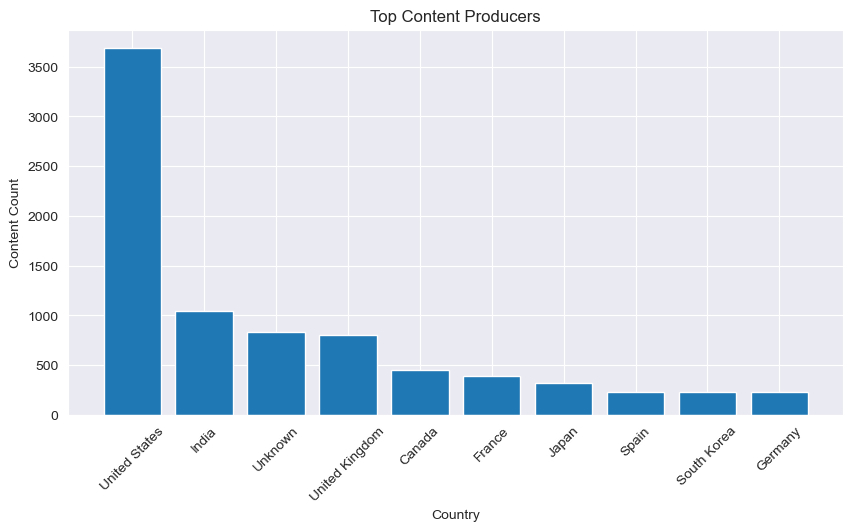

In [31]:
plt.figure(figsize=(10,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Content Count")
plt.xlabel("Country")
plt.title("Top Content Producers");

**<mark>Insights</mark>**

- From above graph we can see that USA, India and UK are top content producers.
- Countries like Canada, France, Japan, Spain, South Korea and Germany have moderate of scope for improvement.

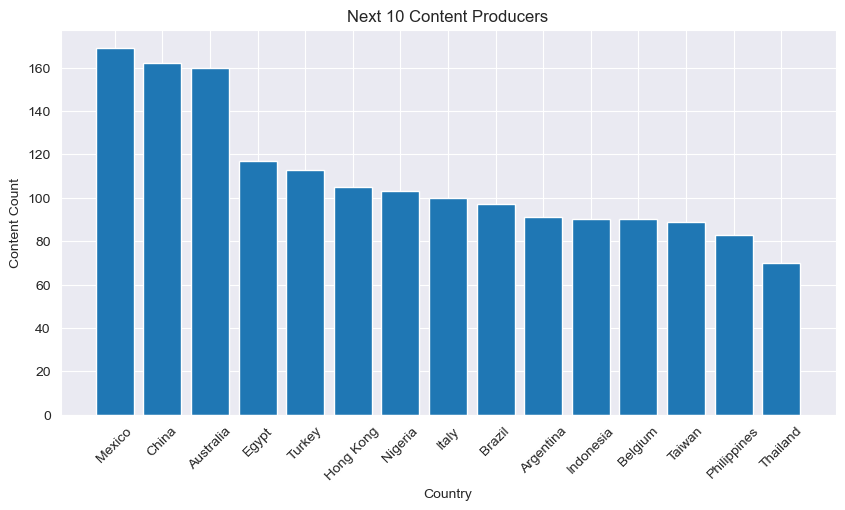

In [32]:
cdf=country_df["country"].value_counts()[10:25]
plt.figure(figsize=(10,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Content Count")
plt.xlabel("Country")
plt.title("Next 10 Content Producers");

**<mark>Insights</mark>**

- Above graph shows the list of countries that have a lot of scope for improvement.
- In following analyses, we will draw insights on how can we improve the content or what type of content to produce using above countries

In [33]:
non_top_3_countrries = country_df["country"].value_counts()[4:25].index.tolist()
non_top_3_countrries

['Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China',
 'Australia',
 'Egypt',
 'Turkey',
 'Hong Kong',
 'Nigeria',
 'Italy',
 'Brazil',
 'Argentina',
 'Indonesia',
 'Belgium',
 'Taiwan',
 'Philippines',
 'Thailand']

**<mark>Insights</mark>**

- We will focus on above countries the most as there a higher chance if growth if we invest in producing content for them

### Cast Analysis

In [34]:
cast_df.describe()

,show_id,cast
count,64951,64951
unique,8807,36440
top,s1855,Unknown
freq,50,825


In [35]:
merge_df=df.merge(cast_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,cast
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,Unknown
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,Ama Qamata
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,Khosi Ngema
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,Gail Mabalane
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,Thabang Molaba


In [36]:
cdf = cast_df["cast"].value_counts()[:11].reset_index()
cdf

,cast,count
0,Unknown,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


**<mark>Insights</mark>**

- Above table shows the list of top cast present in movies and tv shows
- There is lot of missing values in this data, which have been replaced by "Unknown"

In [37]:
cdf = cdf.iloc[1:11]
mdf=merge_df.loc[merge_df["type"]=="Movie"]["cast"].value_counts()[1:11].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["cast"].value_counts()[1:11].reset_index()
cdf
mdf
tdf

,cast,count
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29
10,Amitabh Bachchan,28


,cast,count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
5,Paresh Rawal,28
6,Julie Tejwani,28
7,Amitabh Bachchan,28
8,Rupa Bhimani,27
9,Boman Irani,27


,cast,count
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Yoshimasa Hosoya,15
7,Jun Fukuyama,15
8,David Attenborough,14
9,Yoshitsugu Matsuoka,13


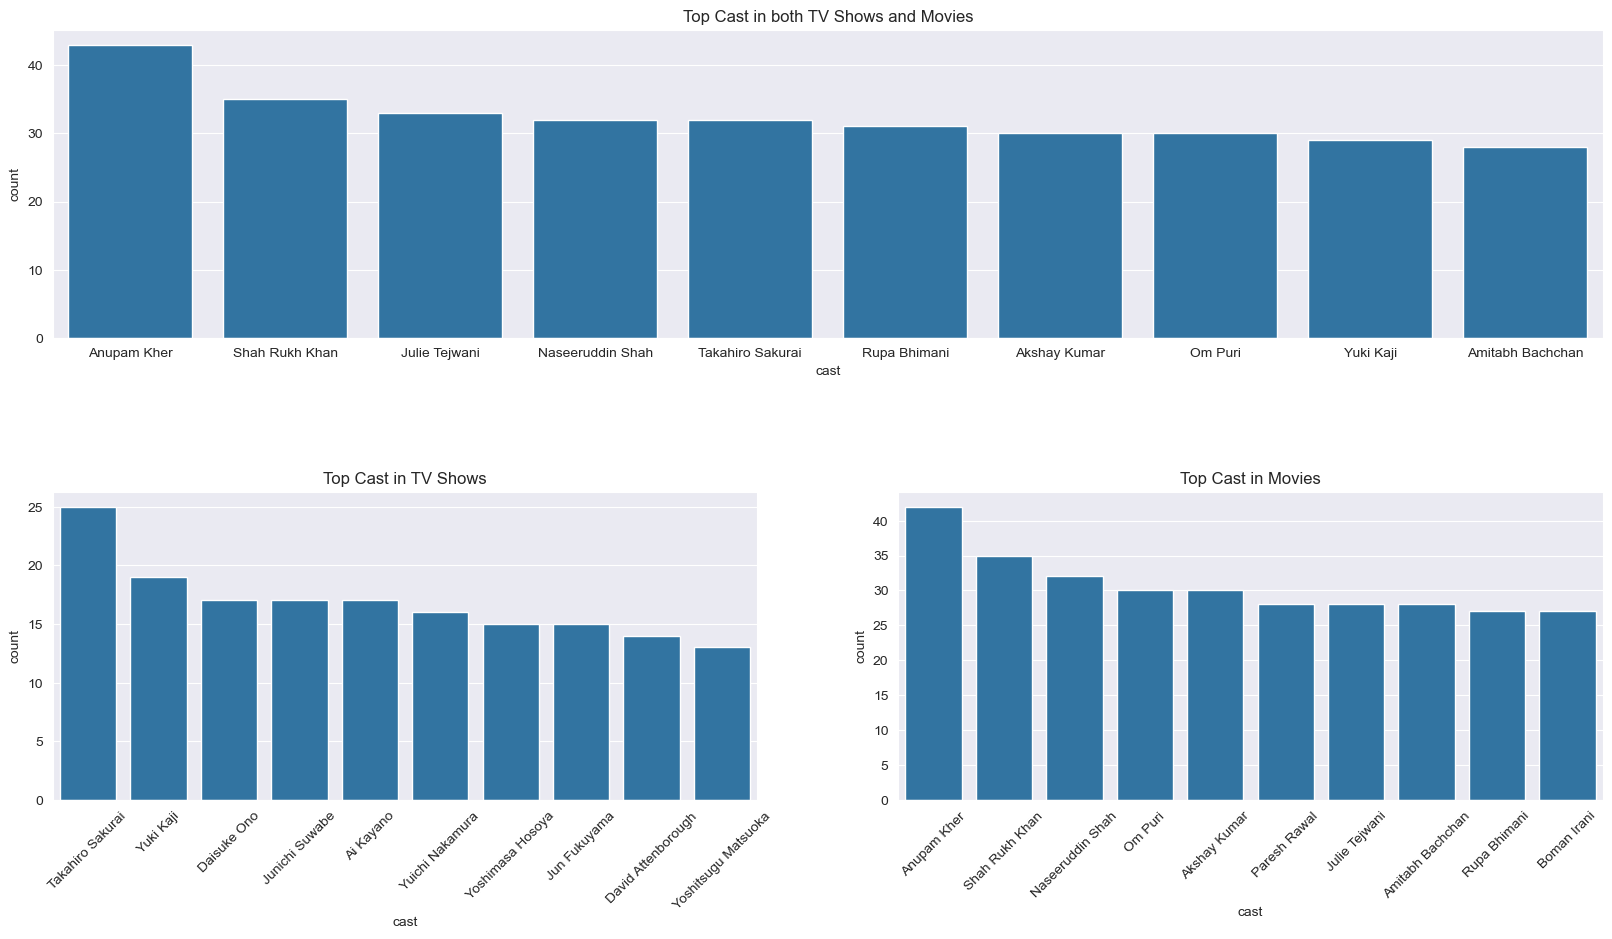

In [38]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=cdf, x="cast", y="count", ax=ax1)
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top Cast in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="cast", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top Cast in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="cast", y="count", ax=ax3)
ax3.set_title("Top Cast in Movies")
ax3.tick_params(axis='x', labelrotation=45);


**<mark>Insights</mark>**

- Above graphs shows the list of top cast present in movies and tv shows
- There appears to be lot of Indian actors in the movies section 


### Genre Analysis

In [39]:
listed_df.describe()

,show_id,listed_in
count,19323,19323
unique,8807,42
top,s8807,International Movies
freq,3,2752


In [40]:
ldf=listed_df["listed_in"].value_counts()[:10].reset_index()
ldf

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [41]:
merge_df=df.merge(listed_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,TV Mysteries
4,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,Crime TV Shows


In [42]:
mdf=merge_df.loc[merge_df["type"]=="Movie"]["listed_in"].value_counts()[:10].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["listed_in"].value_counts()[:10].reset_index()
ldf
mdf
tdf

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


,listed_in,count
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


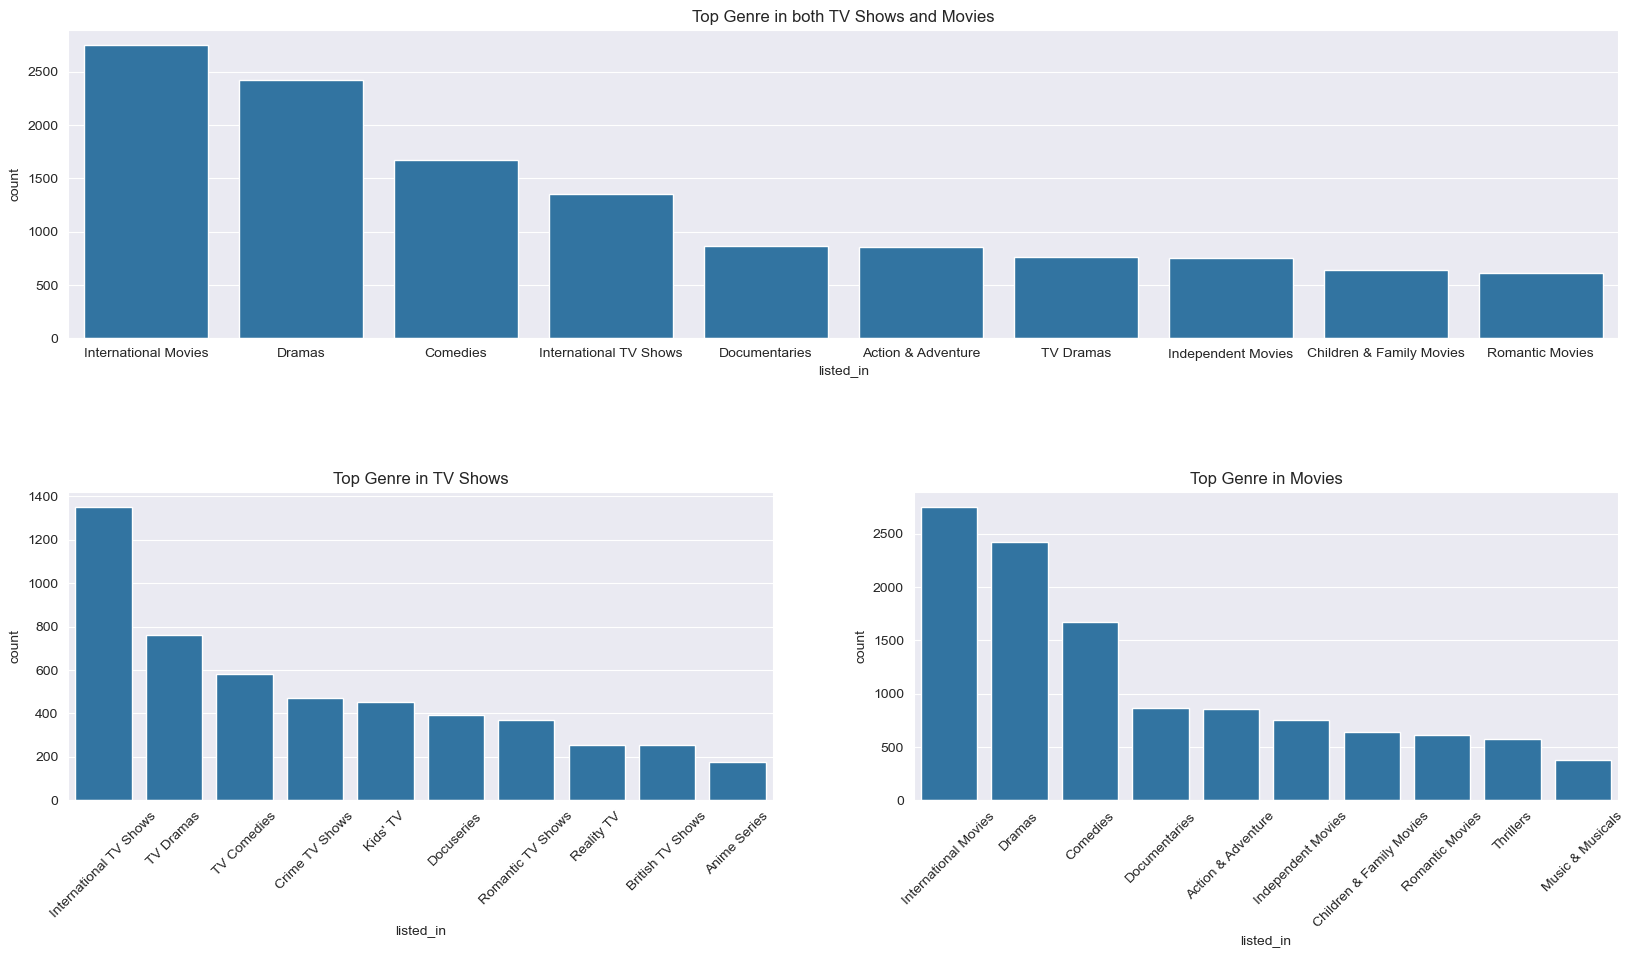

In [43]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=ldf, x="listed_in", y="count", ax=ax1)
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top Genre in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="listed_in", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top Genre in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="listed_in", y="count", ax=ax3)
ax3.set_title("Top Genre in Movies")
ax3.tick_params(axis='x', labelrotation=45);

**<mark>Insights</mark>**

- Above graphs shows the list of top genres present in movies and tv show category
- It appears that users like watching international movies/tv shows, dramas and commedies the most


### Director Analysis

In [82]:
director_df.describe()

,show_id,director
count,9612,9612
unique,8807,4994
top,s5888,Unknown
freq,13,2634


In [83]:
merge_df=df.merge(director_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,director
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,Kirsten Johnson
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,Unknown
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,Unknown
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,Unknown


In [84]:
ddf = director_df["director"].value_counts()[:11].reset_index()
ddf

,director,count
0,Unknown,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12


**<mark>Insights</mark>**

- Above table shows the list of top directors present in movies and tv shows
- There is lot of missing values in this data, which have been replaced by "Unknown"

In [85]:
ddf = ddf.iloc[1:11]
mdf=merge_df.loc[merge_df["type"]=="Movie"]["director"].value_counts()[1:11].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["director"].value_counts()[1:11].reset_index()
ddf
mdf
tdf

,director,count
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12
10,Youssef Chahine,12


,director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Jay Karas,15
5,Marcus Raboy,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Jay Chapman,12


,director,count
0,Alastair Fothergill,3
1,Ken Burns,3
2,Iginio Straffi,2
3,Gautham Vasudev Menon,2
4,Hsu Fu-chun,2
5,Stan Lathan,2
6,Shin Won-ho,2
7,Joe Berlinger,2
8,Lynn Novick,2
9,Rob Seidenglanz,2


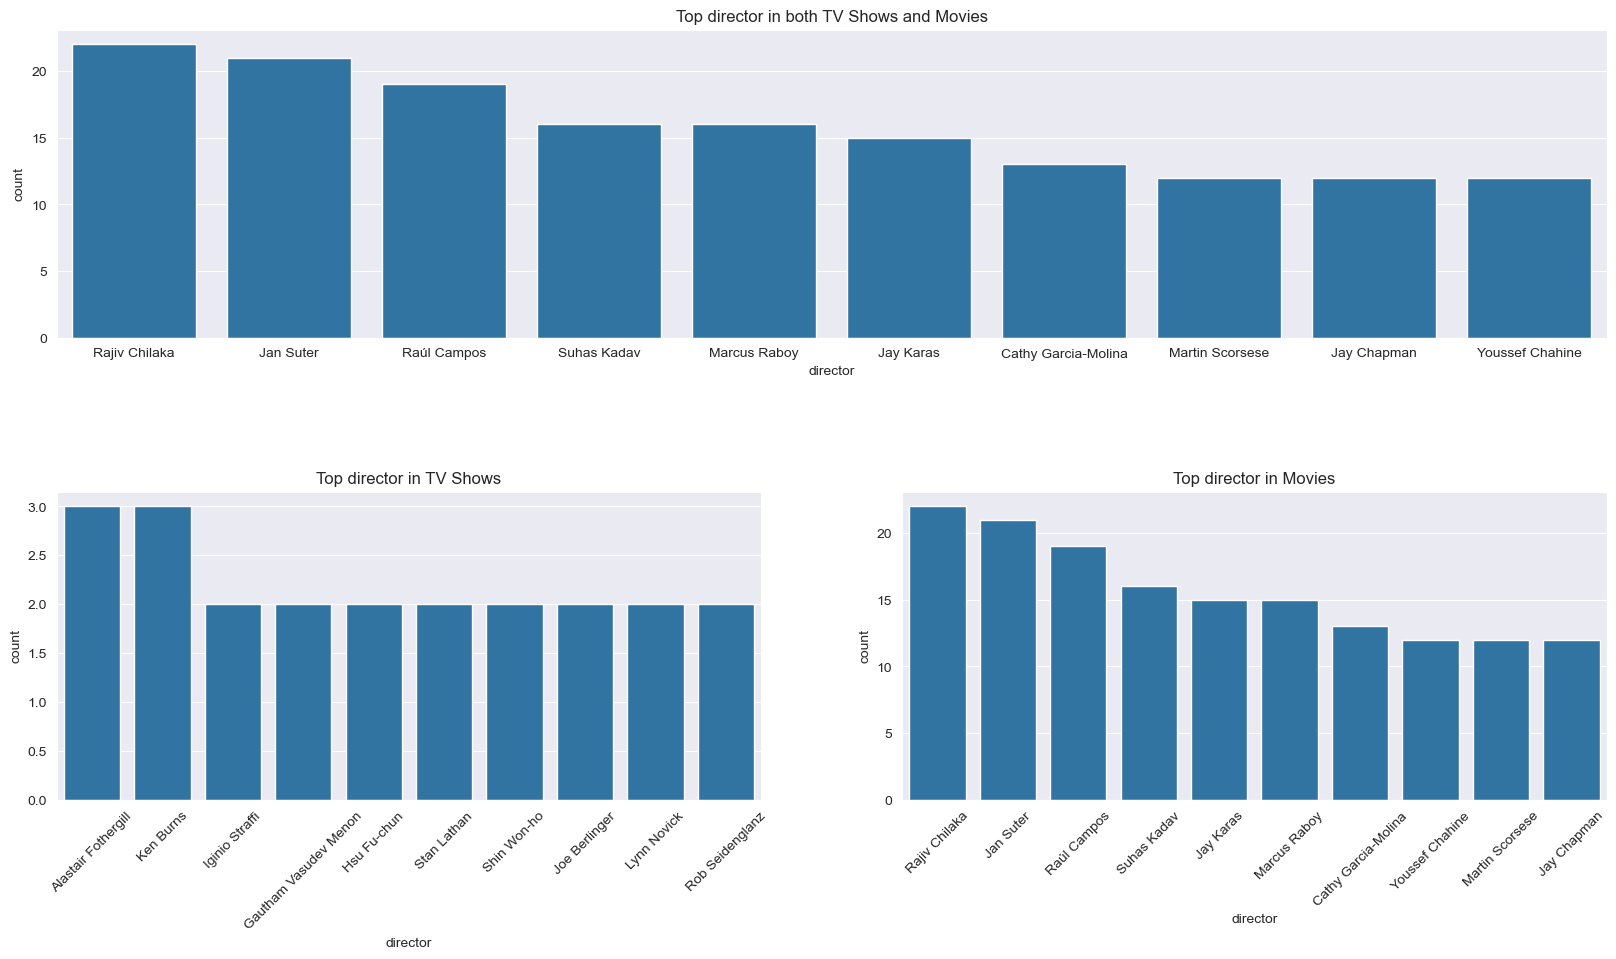

In [86]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=ddf, x="director", y="count", ax=ax1)
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top director in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="director", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top director in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="director", y="count", ax=ax3)
ax3.set_title("Top director in Movies")
ax3.tick_params(axis='x', labelrotation=45);

**<mark>Insights</mark>**

- Above graphs shows the list of top directors present in movies and tv shows

### Release Timeline Analysis

In [45]:
stream_timeline=df.groupby(["date_added_year_month","type"])["show_id"].count().reset_index().set_index("date_added_year_month")
stream_timeline.head()

,type,show_id
date_added_year_month,,
2008-01,Movie,1
2008-02,TV Show,1
2009-05,Movie,1
2009-11,Movie,1
2010-11,Movie,1


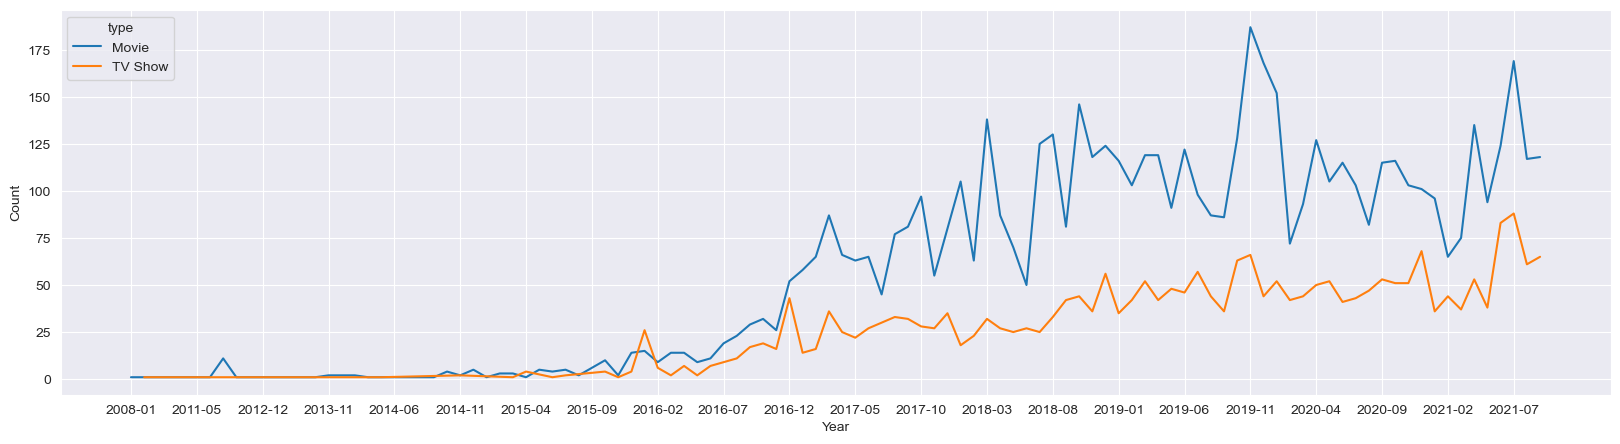

In [46]:
plt.figure(figsize=(20,5))
# fig, ax = plt.subplots(figsize=(20, 5))
l=sns.lineplot(data=stream_timeline, x="date_added_year_month", y="show_id", hue="type")
l.set(xlabel="Year", ylabel="Count");

l.set_xticks(l.get_xticks()[::5]);
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

In [47]:
monthly_release=df.groupby(["date_added_month","date_added_month_name","type"])["show_id"].count().reset_index().set_index("date_added_month")
monthly_release.head()

,date_added_month_name,type,show_id
date_added_month,,,
1,January,Movie,546
1,January,TV Show,279
2,February,Movie,382
2,February,TV Show,175
3,March,Movie,529


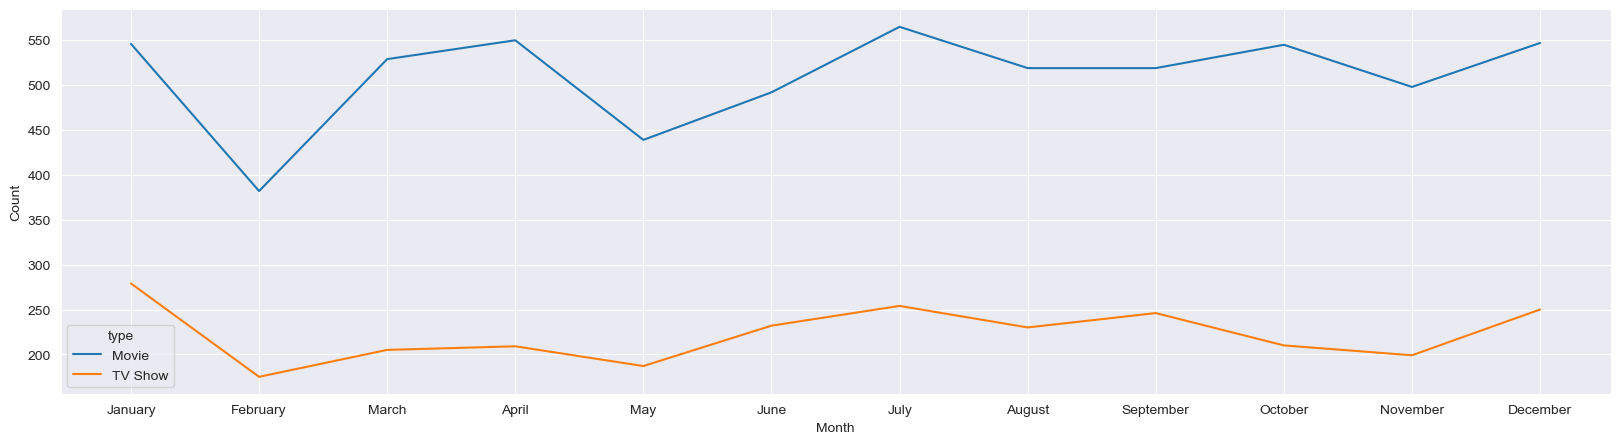

In [48]:
plt.figure(figsize=(20,5))

lp=sns.lineplot(data=monthly_release, x="date_added_month_name", y="show_id", hue="type")
lp.set(xlabel="Month", ylabel="Count");

<Axes: xlabel='type', ylabel='count'>

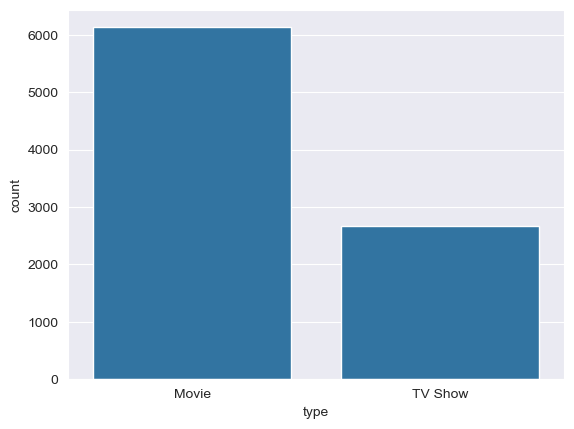

In [49]:
sns.countplot(data=df, x="type")

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='rating', ylabel='count'>

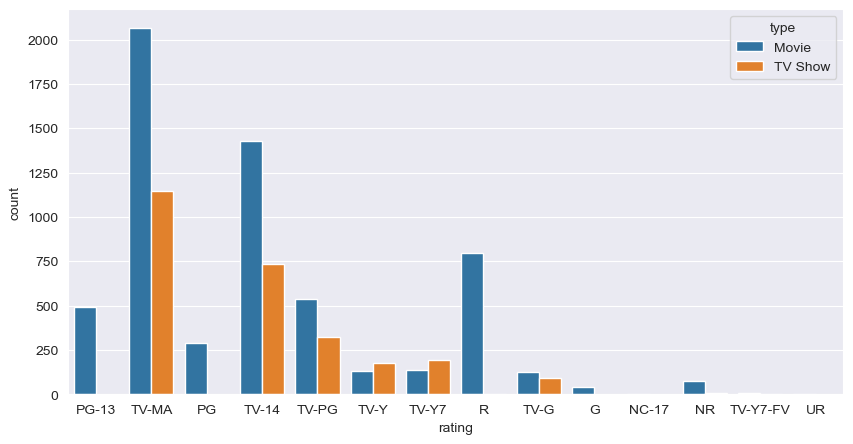

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rating", hue="type")

In [51]:
merge_df=movies_df.merge(listed_df, on='show_id', how='inner')
merge_df = merge_df.loc[merge_df['date_added_year'] >= 2014]

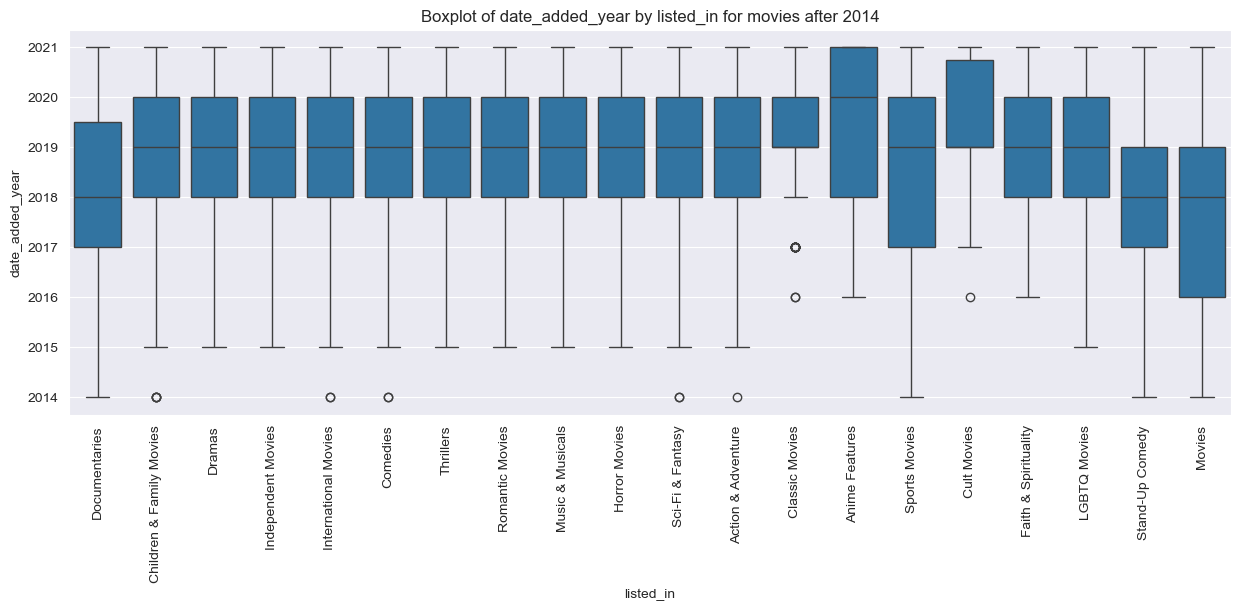

In [52]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df, x="listed_in", y="date_added_year")
plt.title("Boxplot of date_added_year by listed_in for movies after 2014")
plt.xticks(rotation=90);

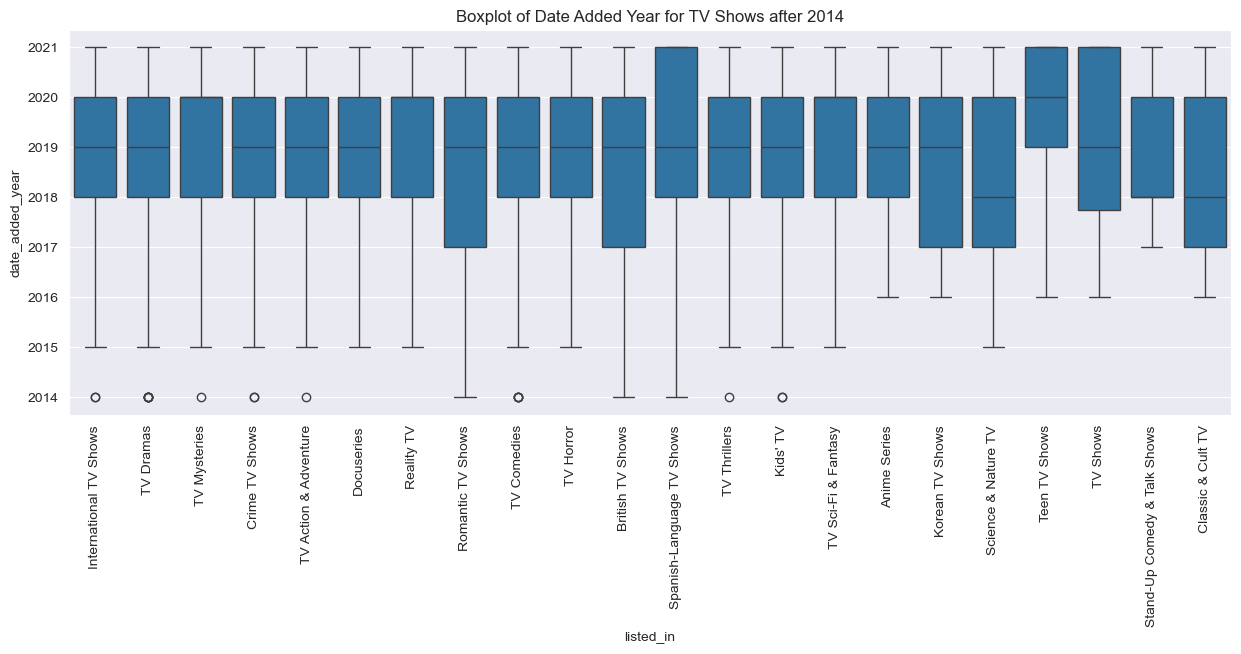

In [53]:
merge_df=tv_shows_df.merge(listed_df, on='show_id', how='inner')
merge_df = merge_df.loc[merge_df['date_added_year'] >= 2014]
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df, x="listed_in", y="date_added_year")
plt.title('Boxplot of Date Added Year for TV Shows after 2014')
plt.xticks(rotation=90);

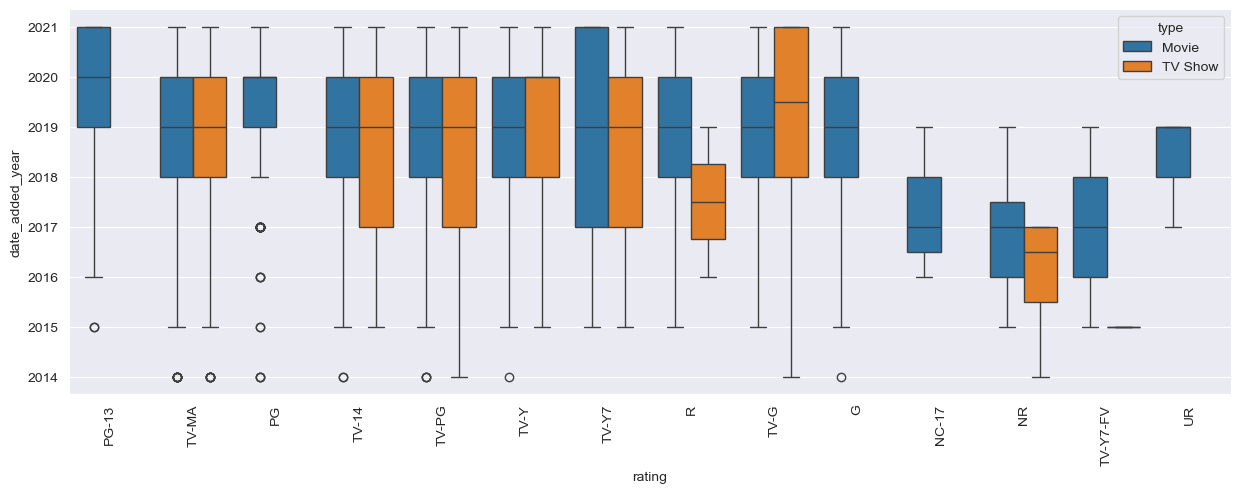

In [54]:

plt.figure(figsize=(15, 5))
rating_df = df.loc[df['date_added_year'] >= 2014]
sns.boxplot(data=rating_df, x="rating", y="date_added_year", hue="type")
plt.xticks(rotation=90);

In [55]:
merge_df = df.merge(country_df, on="show_id")
merge_df = merge_df.merge(listed_df, on="show_id")

In [56]:
gp=merge_df.groupby(["country","type","listed_in"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})

In [57]:
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="dense",ascending=False)
gp=gp.loc[gp["rank"] < 4].sort_values(by='country')

In [58]:
pd.set_option('display.max_rows', None)
suggested_tv_genres =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)
suggested_tv_genres 

,country,listed_in,rank
18,Argentina,International Movies,1.0
15,Argentina,Dramas,2.0
12,Argentina,Comedies,3.0
47,Australia,Dramas,1.0
51,Australia,International Movies,2.0
42,Australia,Children & Family Movies,3.0
107,Belgium,International Movies,1.0
104,Belgium,Dramas,2.0
102,Belgium,Comedies,3.0
130,Brazil,International Movies,1.0


In [59]:
suggested_tv_genres =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)
suggested_tv_genres 
pd.reset_option('display.max_rows')

,country,listed_in,rank
34,Argentina,Spanish-Language TV Shows,1.0
30,Argentina,International TV Shows,2.0
28,Argentina,Crime TV Shows,3.0
64,Australia,International TV Shows,1.0
65,Australia,Kids' TV,2.0
71,Australia,TV Dramas,3.0
115,Belgium,International TV Shows,1.0
113,Belgium,Crime TV Shows,2.0
118,Belgium,TV Dramas,2.0
117,Belgium,TV Action & Adventure,3.0


In [60]:
gp=merge_df.groupby(["country","type","rating"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})

In [61]:
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="dense",ascending=False)
gp=gp.loc[gp["rank"] < 4].sort_values(by='country')

In [62]:
suggested_tv_ratings =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["count"], axis=1)
suggested_tv_ratings 
pd.reset_option('display.max_rows')

,country,type,rating,rank
13,Argentina,TV Show,TV-MA,1.0
12,Argentina,TV Show,TV-14,2.0
15,Argentina,TV Show,TV-Y,3.0
29,Australia,TV Show,TV-MA,1.0
30,Australia,TV Show,TV-PG,2.0
27,Australia,TV Show,TV-14,3.0
57,Belgium,TV Show,TV-MA,1.0
56,Belgium,TV Show,TV-14,2.0
58,Belgium,TV Show,TV-Y7,3.0
71,Brazil,TV Show,TV-MA,1.0


In [63]:
suggested_movie_ratings =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["count"], axis=1)
suggested_movie_ratings 

,country,type,rating,rank
10,Argentina,Movie,TV-MA,1.0
8,Argentina,Movie,TV-14,2.0
11,Argentina,Movie,TV-PG,3.0
20,Australia,Movie,R,1.0
23,Australia,Movie,TV-MA,2.0
...,...,...,...,...
580,Thailand,Movie,TV-14,2.0
583,Thailand,Movie,TV-PG,3.0
590,Turkey,Movie,TV-MA,1.0
588,Turkey,Movie,TV-14,2.0


In [64]:
df

,show_id,type,title,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,2021-09,2021,9,September
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2019-11-20,2007,R,158,2019-11,2019,11,November
8803,s8804,TV Show,Zombie Dumb,2019-07-01,2018,TV-Y7,2,2019-07,2019,7,July
8804,s8805,Movie,Zombieland,2019-11-01,2009,R,88,2019-11,2019,11,November
8805,s8806,Movie,Zoom,2020-01-11,2006,PG,88,2020-01,2020,1,January


In [65]:
tv_shows_df["duration"].value_counts()

duration
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
12       2
11       2
17       1
Name: count, dtype: int64

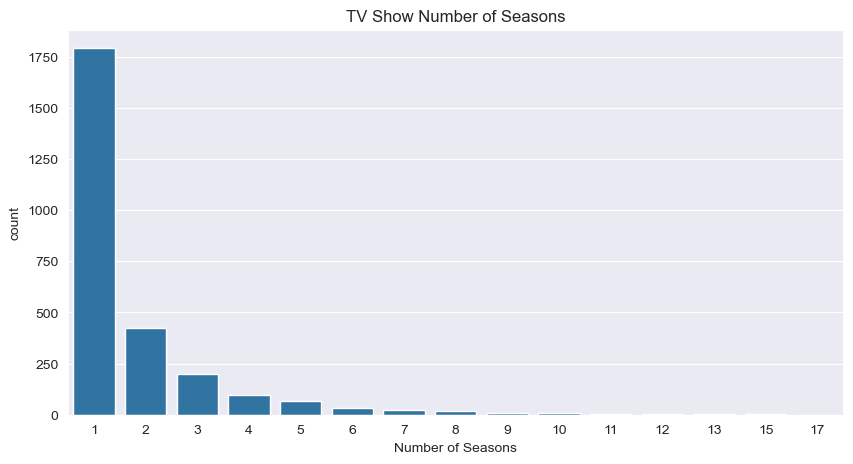

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(data=tv_shows_df, x="duration")
plt.title("TV Show Number of Seasons")
plt.xlabel("Number of Seasons");

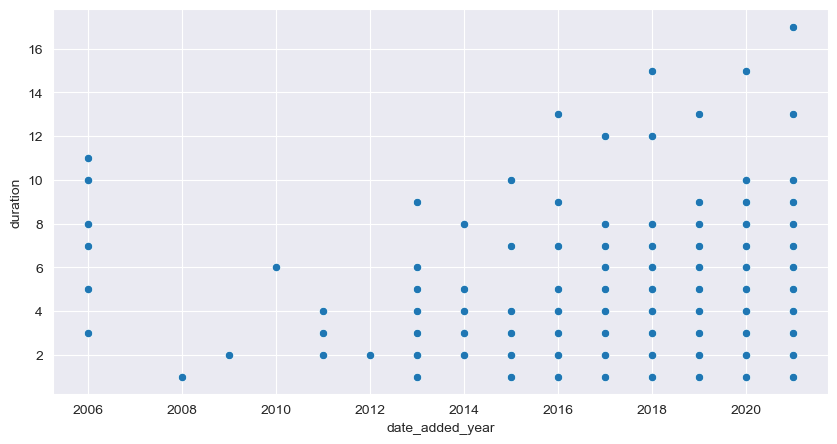

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tv_shows_df, x="date_added_year", y="duration");

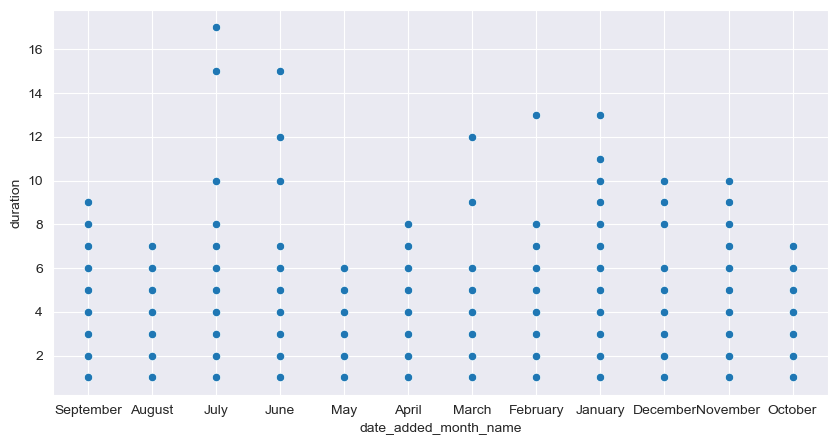

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tv_shows_df, x="date_added_month_name", y="duration");

In [69]:
movies_df["duration"].value_counts()

duration
90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: count, Length: 205, dtype: int64

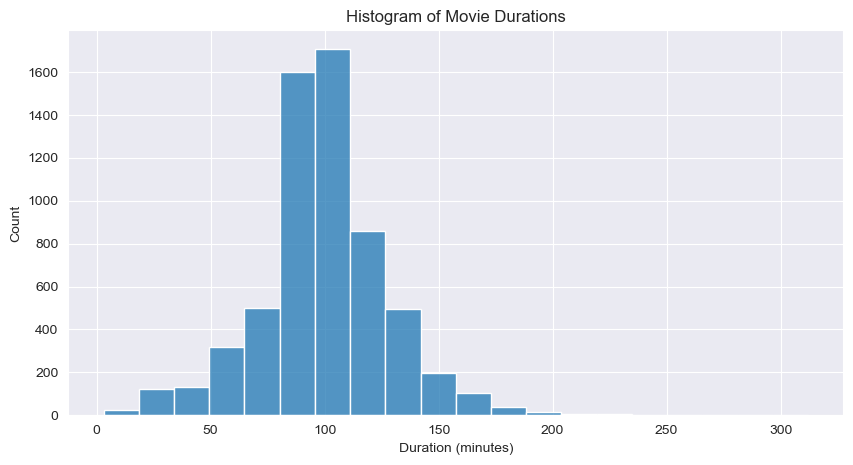

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(data=movies_df, x="duration", bins=20)
plt.title("Histogram of Movie Durations")
plt.xlabel("Duration (minutes)");

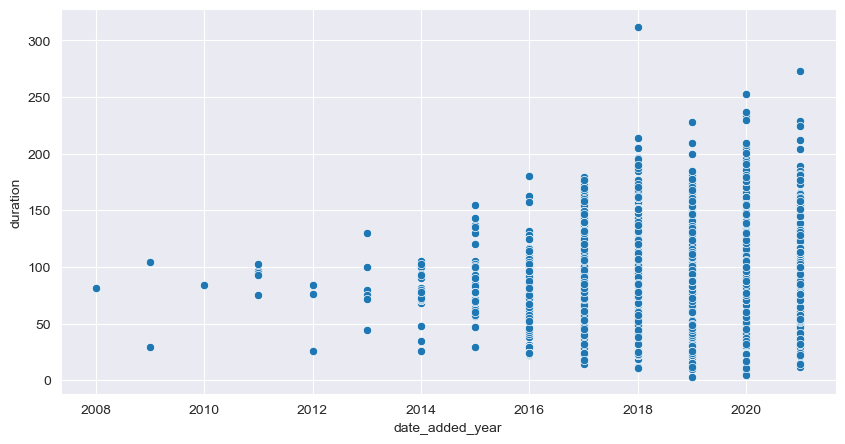

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=movies_df, x="date_added_year", y="duration");

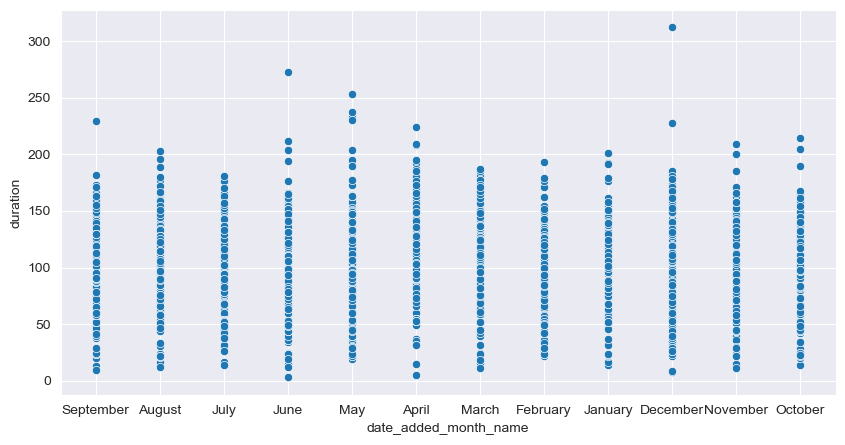

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=movies_df, x="date_added_month_name", y="duration");

<Axes: >

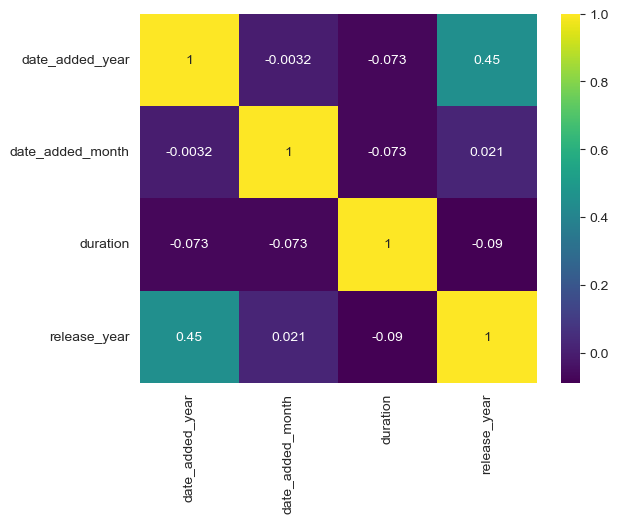

In [73]:
sns.heatmap(tv_shows_df[["date_added_year","date_added_month","duration","release_year"]].corr(), annot=True, cmap="viridis") 

<Axes: >

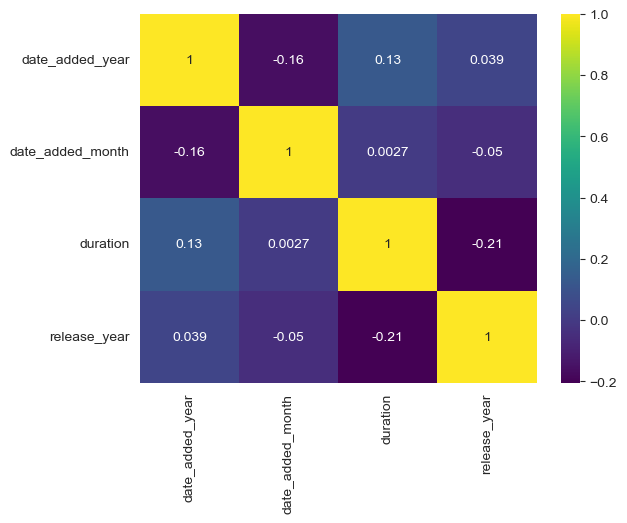

In [74]:
sns.heatmap(movies_df[["date_added_year","date_added_month","duration","release_year"]].corr(), annot=True, cmap="viridis") 